# Data dependence on g, spectral amplitude (flux) varied

In [1]:
import numpy as np
import random
import time

In [2]:
import sys
import os

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
import IPython

In [5]:
import pickle

In [6]:
import swyft

In [7]:
%matplotlib inline

In [8]:
files_name = "simulate_g_values" + "_files"
parent_dir = (os.getcwd()+"/").split('/notebooks/', 1)[0]
start_dir = os.getcwd()
files_dir = os.getcwd() + "/" + files_name 
store_name = files_name.split("_files")[0] + "_store"
store_dir = os.getcwd() + "/" + files_name + "/" + store_name
sys.path.append(files_dir)

In [9]:
from ALP_quick_sim import ALP_sim

In [10]:
with open(files_dir+"/"+'config_objects.pickle', 'rb') as file:
    config_objects = pickle.load(file)
for key in config_objects.keys():
    locals()[key] = config_objects[key]

with open(files_dir+"/"+'sim_objects.pickle', 'rb') as file:
    sim_objects = pickle.load(file)
for key in sim_objects.keys():
    locals()[key] = sim_objects[key]

with open(files_dir+"/"+'obs_objects.pickle', 'rb') as file:
    obs_objects = pickle.load(file) 
for key in obs_objects.keys():
    locals()[key] = obs_objects[key]

In [11]:
stores={}
samples={}
for g in g_values:    
    store = swyft.ZarrStore(store_dir + "/" + store_name + "_" + str(g).replace('.','-'))
    stores[str(g).replace('.','-')] = store
    samples[g] = store
    print('#samples for g='+str(g)+": " + str(len(samples[g])))

#samples for g=-10000000000: 10
#samples for g=-1.9: 10
#samples for g=-1.4: 10
#samples for g=-1.3: 10
#samples for g=-1.1: 10
#samples for g=-1: 10
#samples for g=-0.9: 10
#samples for g=-0.8: 10
#samples for g=-0.7: 10
#samples for g=-0.4: 10
#samples for g=-0.3: 10
#samples for g=-0.2: 10
#samples for g=0: 10
#samples for g=0.1: 10
#samples for g=0.2: 10
#samples for g=0.3: 10
#samples for g=0.4: 10
#samples for g=0.5: 10
#samples for g=0.7: 10
#samples for g=0.8: 10
#samples for g=1: 10
#samples for g=1.2: 10
#samples for g=1.4: 10
#samples for g=1.8: 10
#samples for g=2: 10


# Visualize observations

Generating new null-hypothesis... 

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


done.


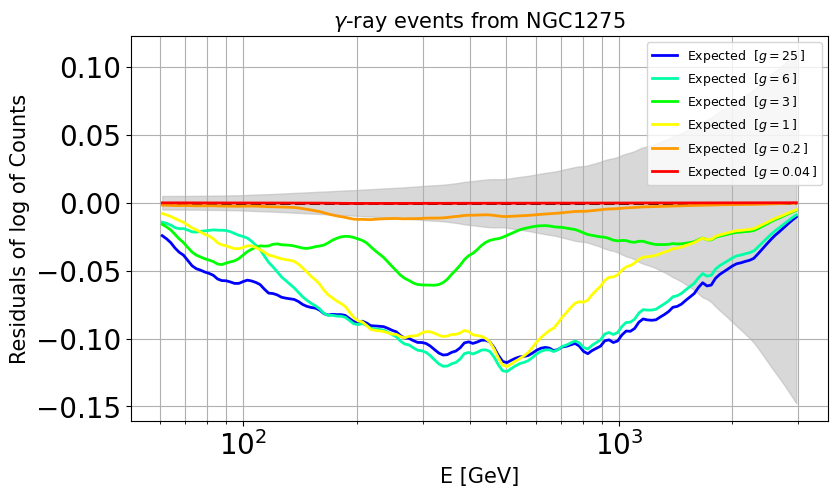

In [12]:
A.configure_plot(xmin = None, xmax = None, ymin=None, ymax=None, logx=1, legend = 1)
A.compute_case(new_fig=1,null=1,plot_obs=0,color="k",linestyle="--", label_exp=0)   
for i,tru in enumerate(truths):
        A.configure_model(params=tru, ALP_seed=0)
        A.compute_case(new_fig=0,plot_obs=0,color=colors[i], color_obs=colors[i],label_exp=1, errorbands=False)
A.configure_model(ALP_seed=None)

# Compare signals to posterior width

In [61]:
widths =[
    [0.1,0.7,2,1.4],
    [-0.9,-0.4,0.3,0.8,1.2,1.8],              #3sig,2sig,peak,truth,2sig,3sig
    [-1.3,-1,-0.2,0.4,0.5,1.2],
    [-1.1,-0.8,0.2,0.,1.,1.4],
    [g_values[0],g_values[0],-1.4, -0.7,-0.7,-0.3],
    [g_values[0],g_values[0],-1.9,-1.4,-0.8,-0.4],
]

colors_widths = [
    (.6,0,0),
    (.6,.2,0),
    (0,.5,.0),
    (0,0,0),
    (0,.4,.6),
    (0,0,.6),
]

transparency = 0.5

logx = 1
logy = 1

In [62]:
widths[3][3]

0.0

In [76]:
def comparisons(which_truth,n=8):
    figs ={}
    A.configure_plot(xmin = None, xmax = None, ymin=None, ymax=None, logx=1, legend = 1) 
    for j,width in enumerate(widths[which_truth:which_truth+1]):
        for i, g in enumerate(width):
            figs[i], _ = plt.subplots(1,2, figsize = (15,4))
            A.compute_case(new_fig=1,null=1,plot_obs=0,color="k",linestyle="--", label_exp=0, axes=figs[i].axes[0])
            for k in range(n):
                A.configure_model(params=samples[g]['params'][k])
                A.import_counts(obs=samples[g]['data'][k],exp=samples[g]['exp'][k])
                A.compute_case(new_fig=0,new_counts=0,plot_obs=0,color=colors_widths[i],
                               label_exp=int(not k), errorbands=False, transparency = transparency, axes=figs[i].axes[0])
                figs[i].axes[1].plot(abs(np.fft.fft(A.counts_exp['y'])),color=colors_widths[i], alpha=0.5)
            obs = observations[which_truth]
            A.import_counts(obs=obs['data'],exp=obs['exp'])
            A.configure_model(params=obs['params'])
            A.compute_case(new_fig=0,new_counts=0,color=colors[which_truth],linestyle="-",label_exp=1,
                           errorbands=0, errors=0, plot_obs=0, axes=figs[i].axes[0])
            figs[i].axes[1].plot(abs(np.fft.fft(A.counts_exp['y'])),color=colors[which_truth])
            if logx: figs[i].axes[1].set_xscale("log")
            if logy: figs[i].axes[1].set_yscale("log")
            figs[i].axes[1].set_ylabel('$|F_k|$',size=A.fontsize)
            figs[i].axes[1].set_xlabel('Bin number',size=A.fontsize)

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


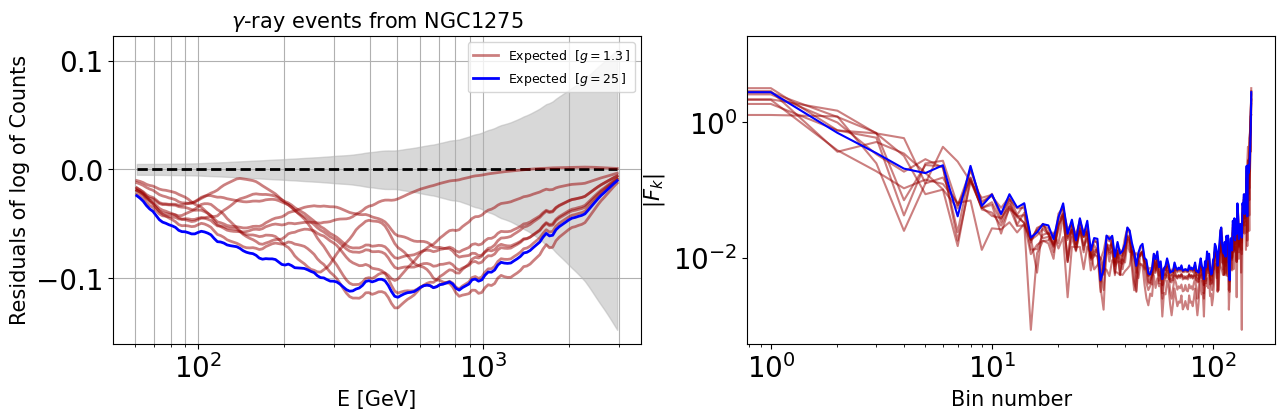

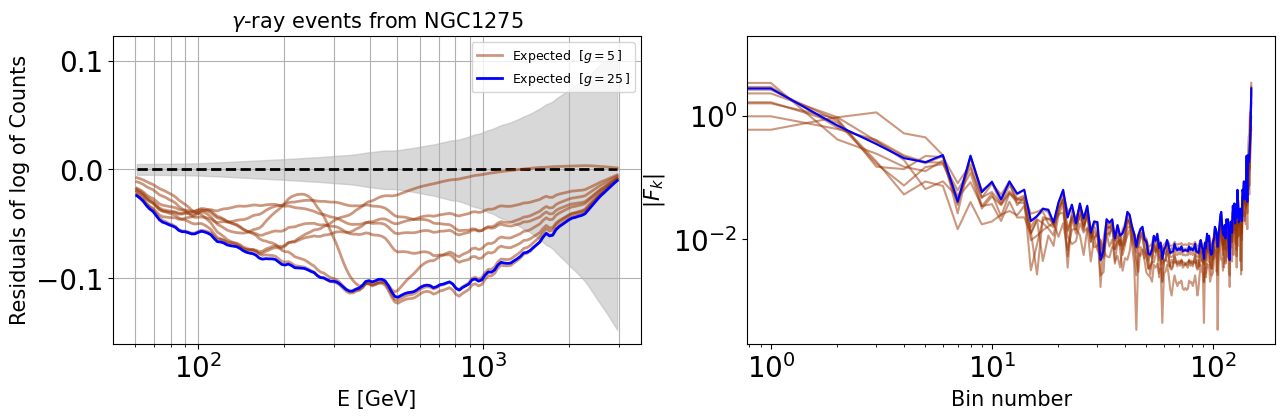

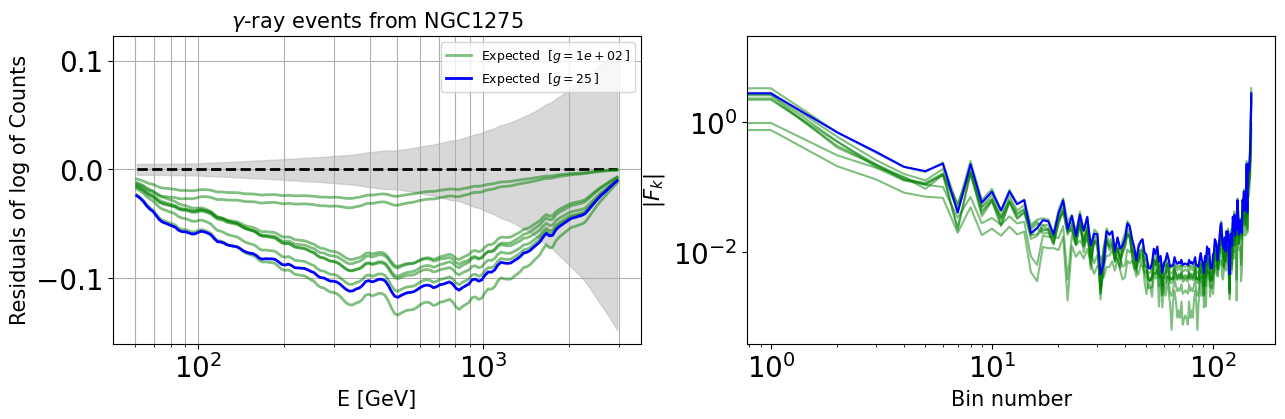

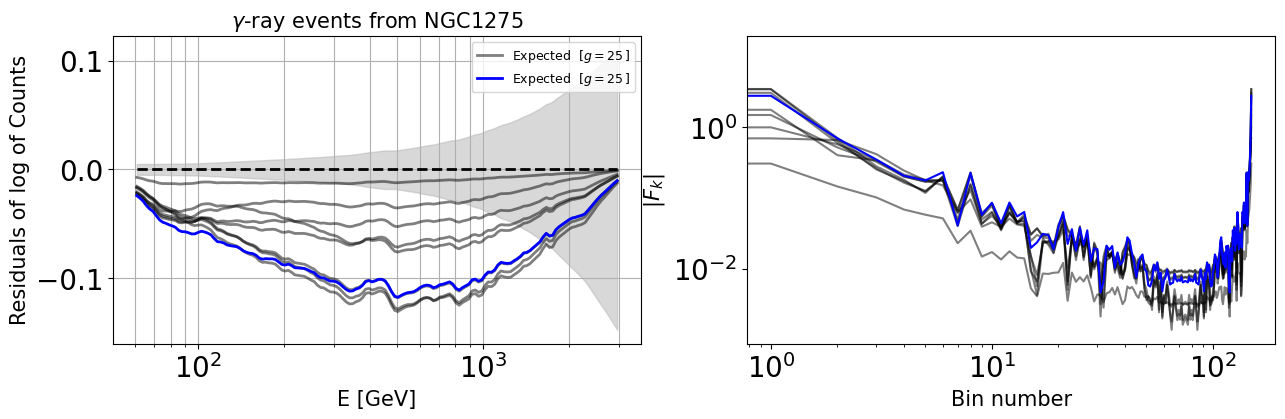

In [77]:
comparisons(0)

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in le

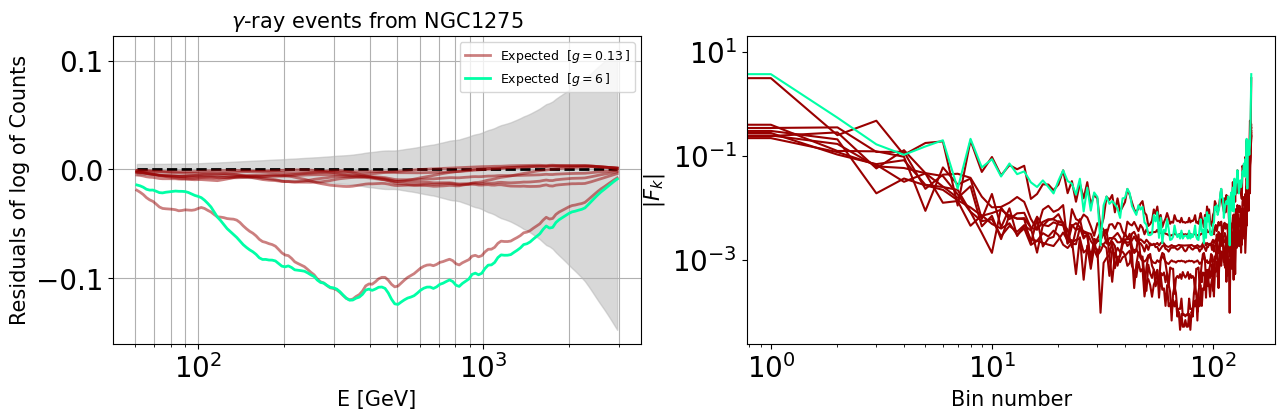

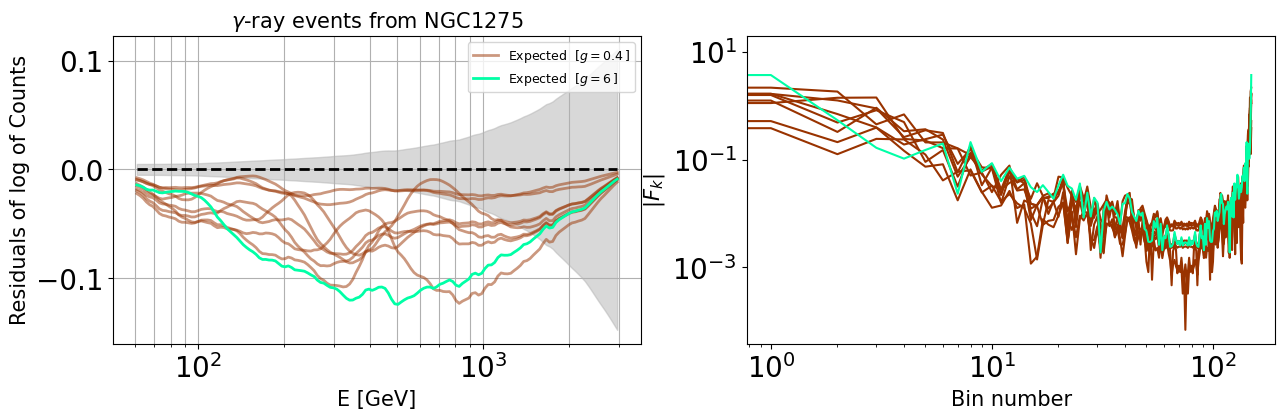

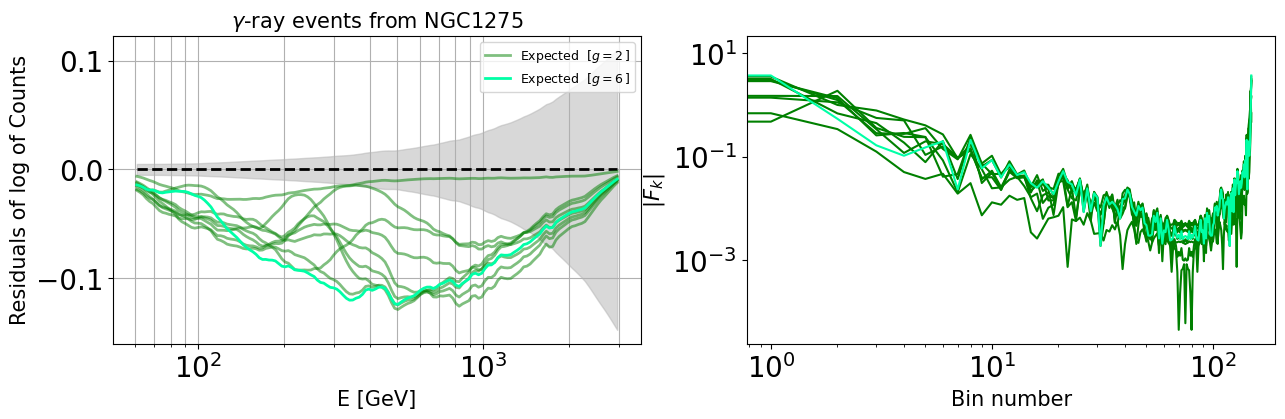

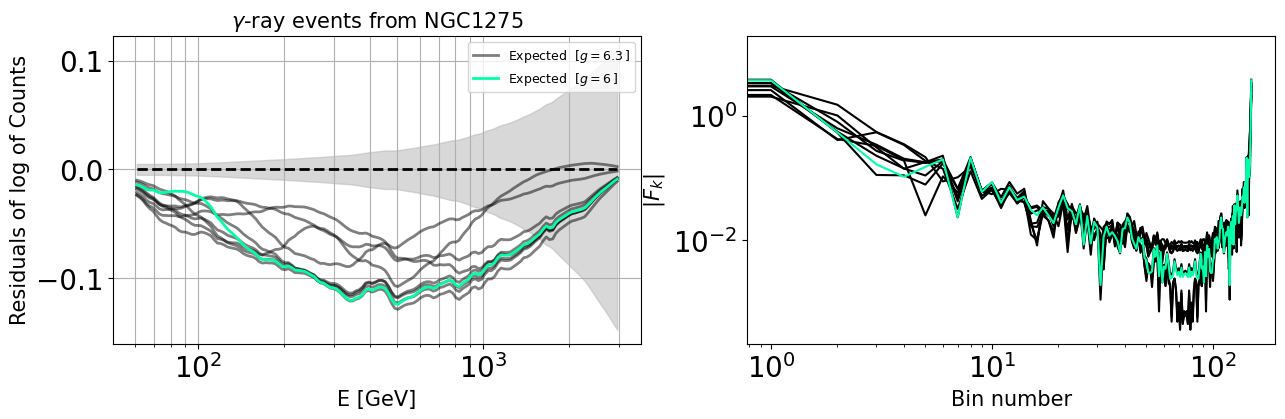

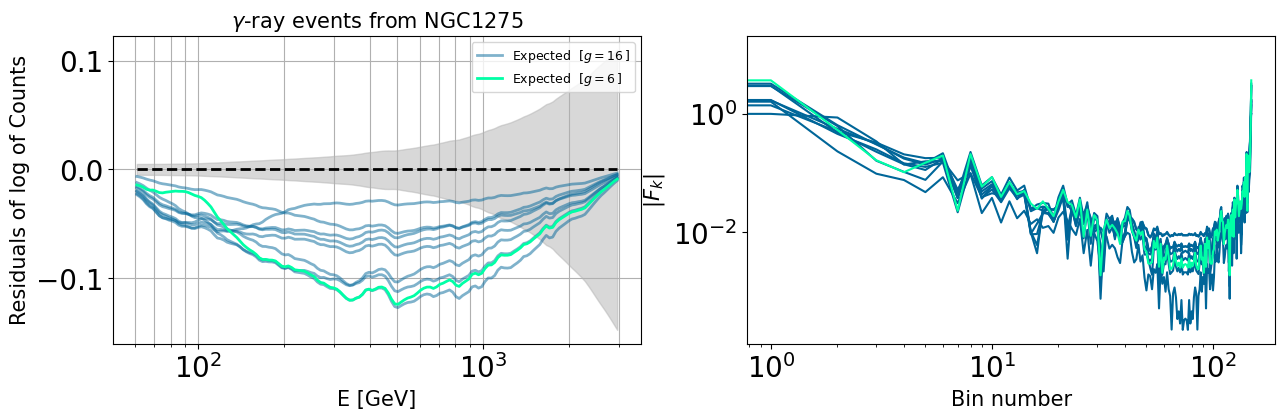

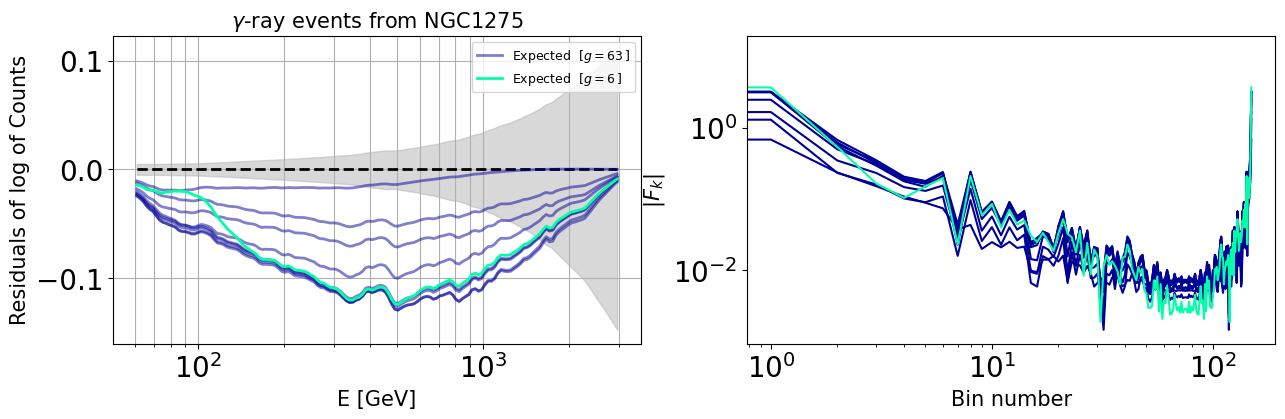

In [65]:
comparisons(1)

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in le

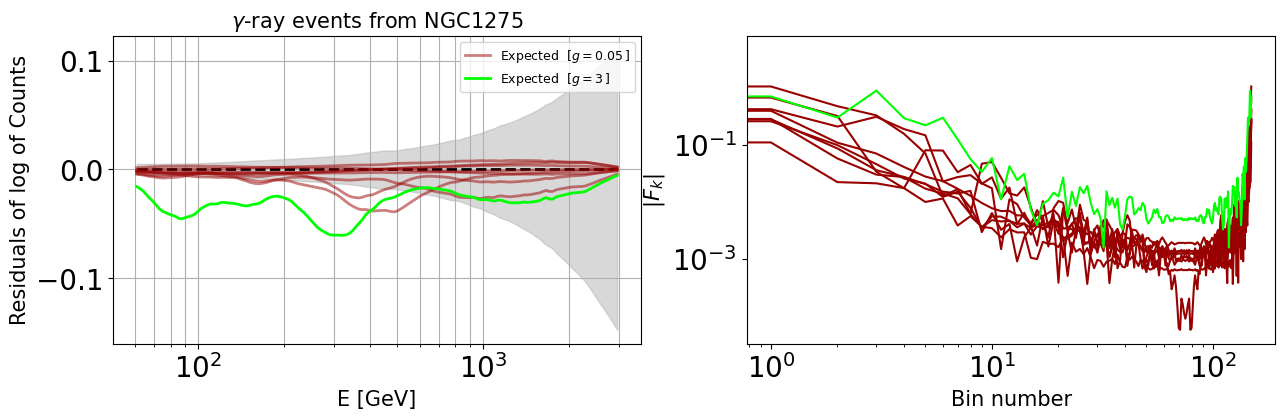

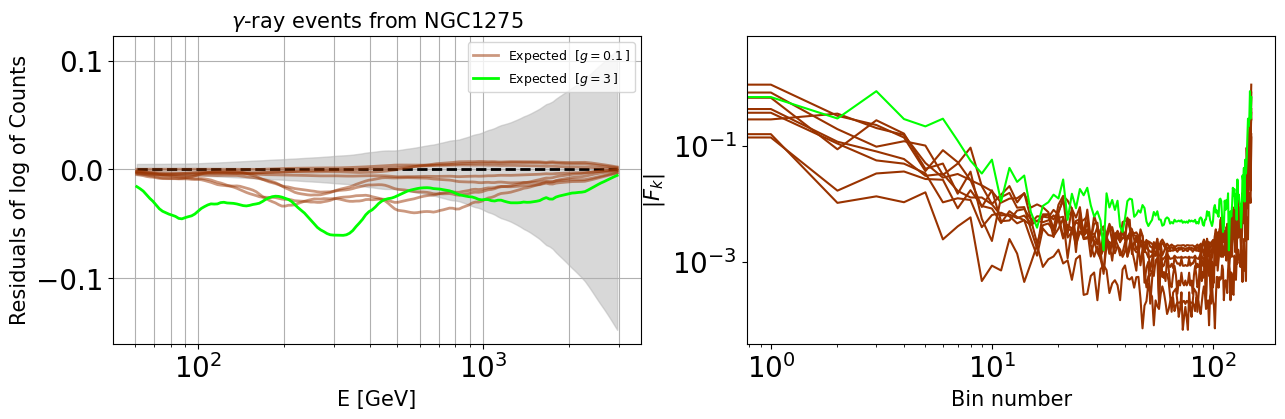

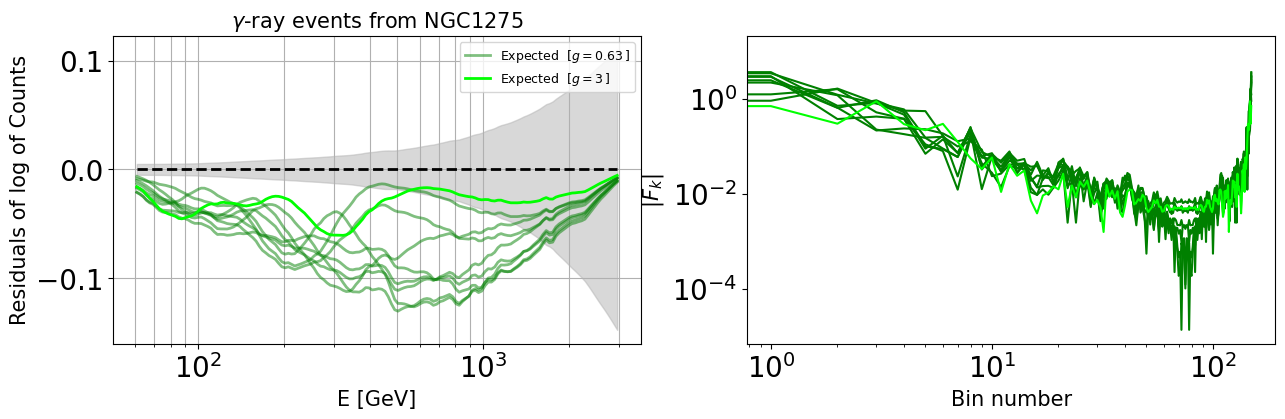

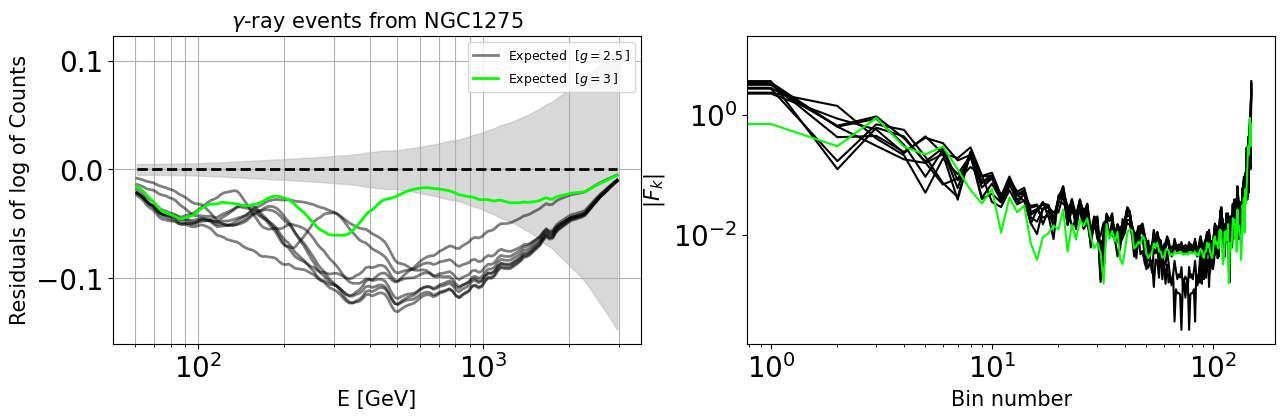

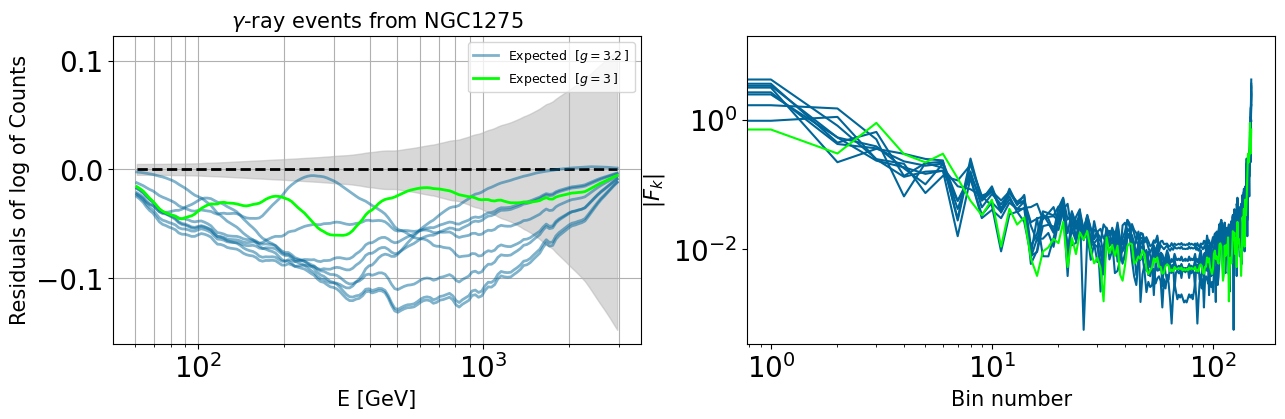

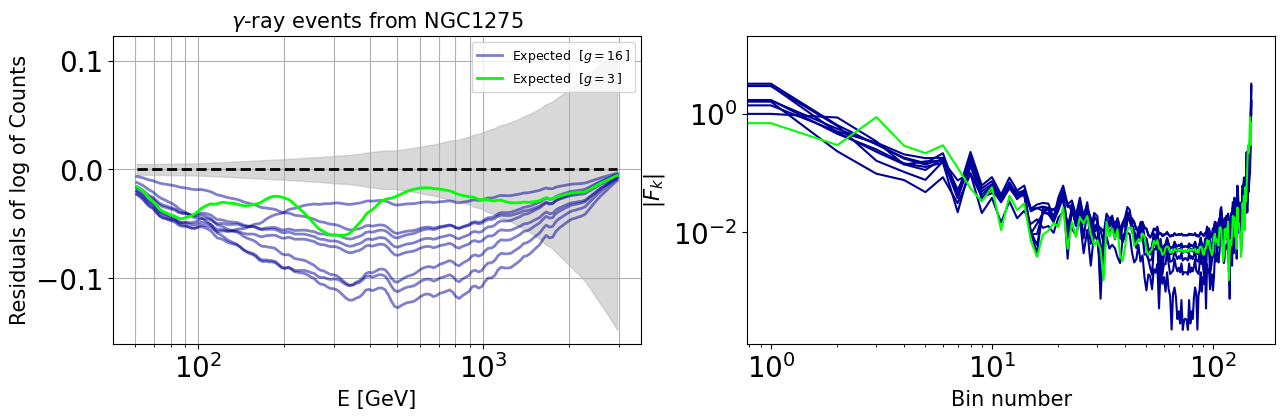

In [66]:
comparisons(2)

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in le

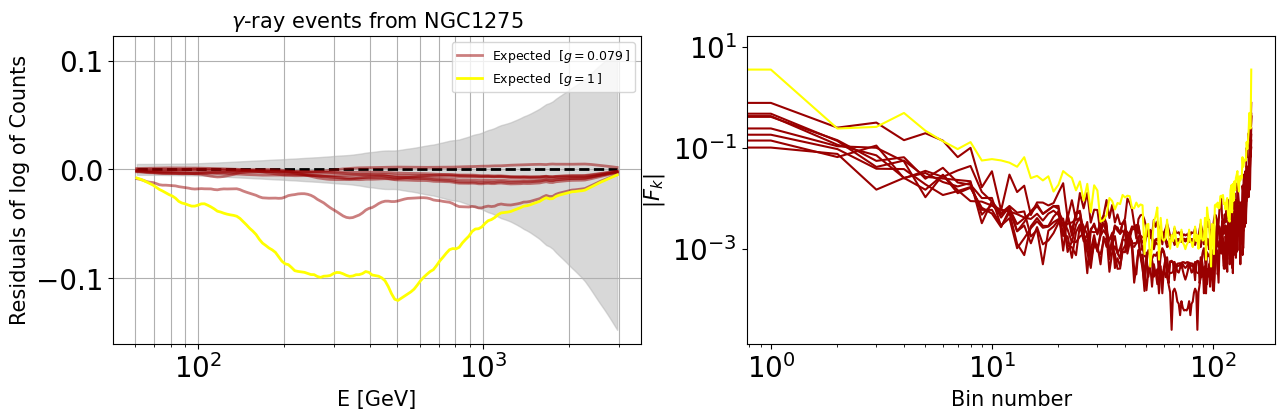

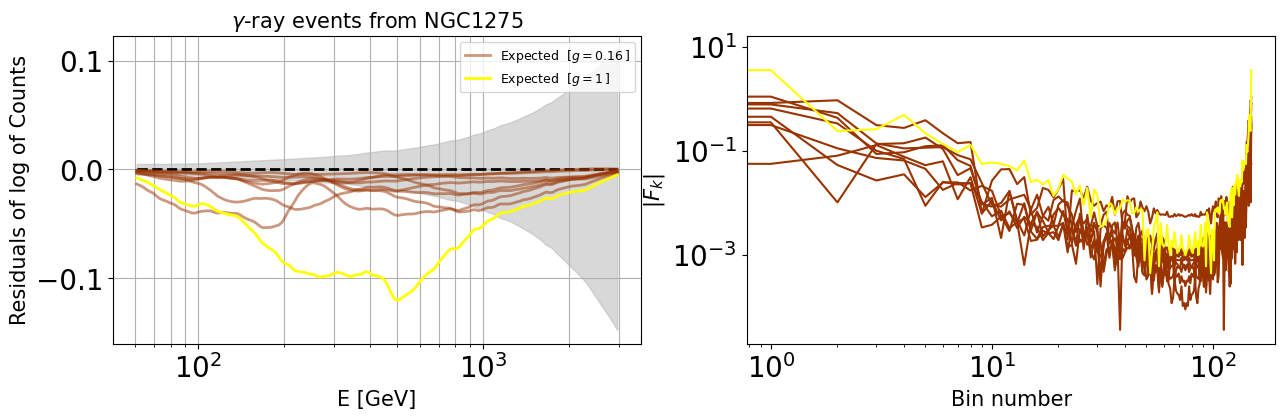

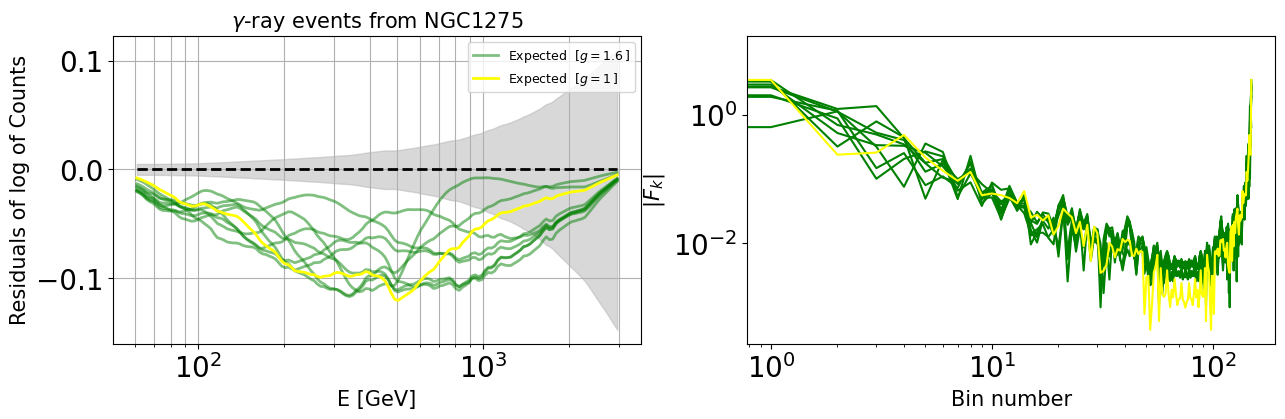

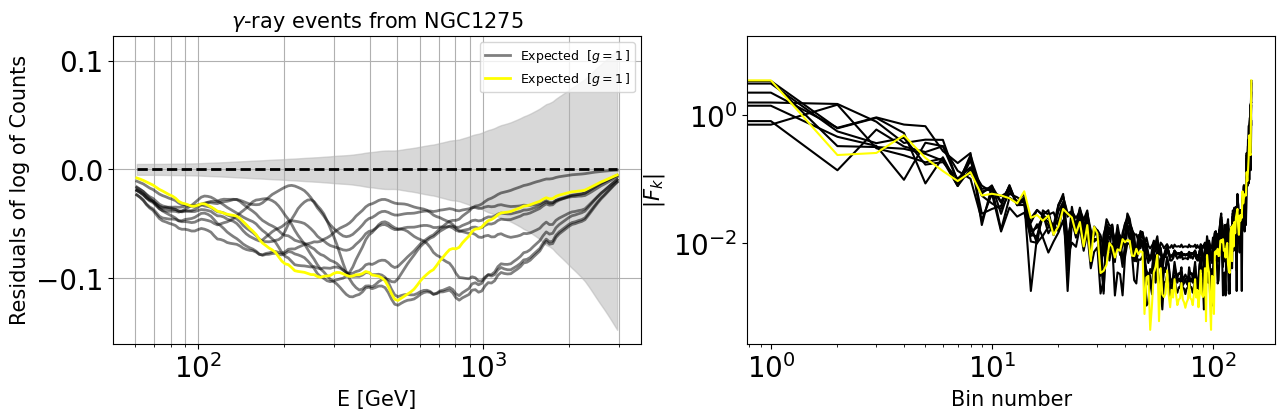

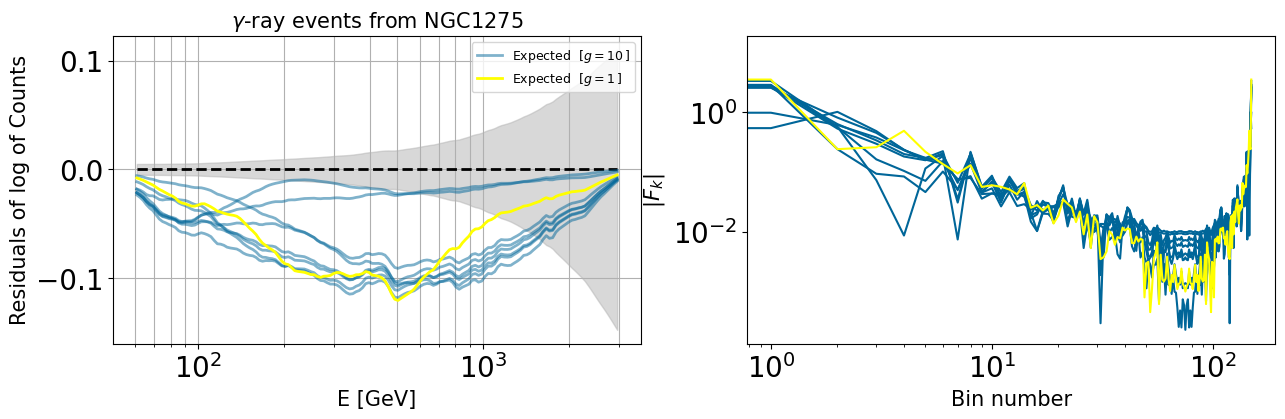

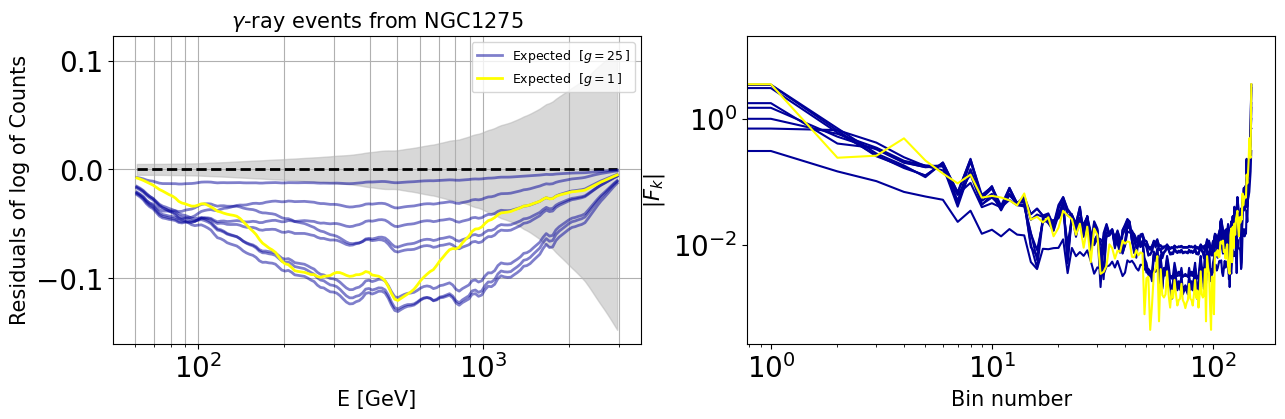

In [67]:
comparisons(3)

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in le

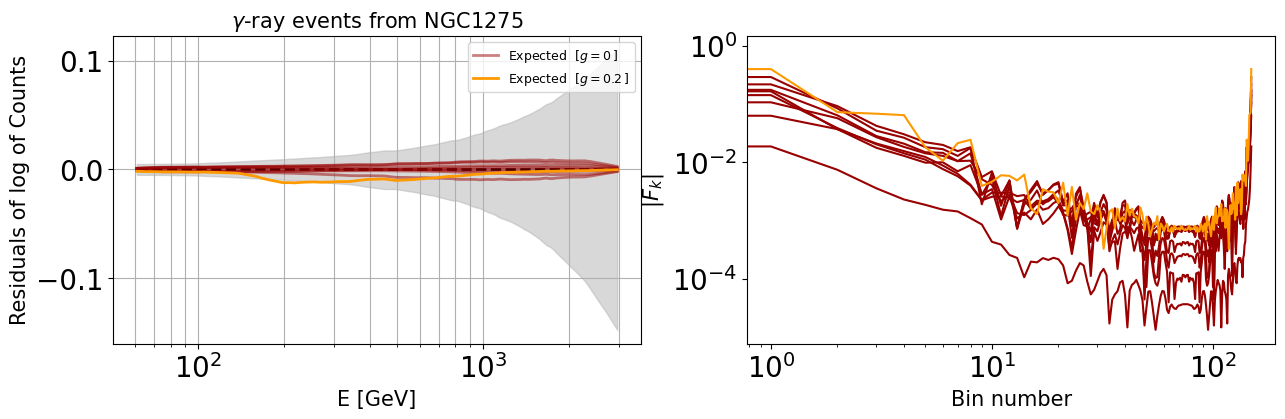

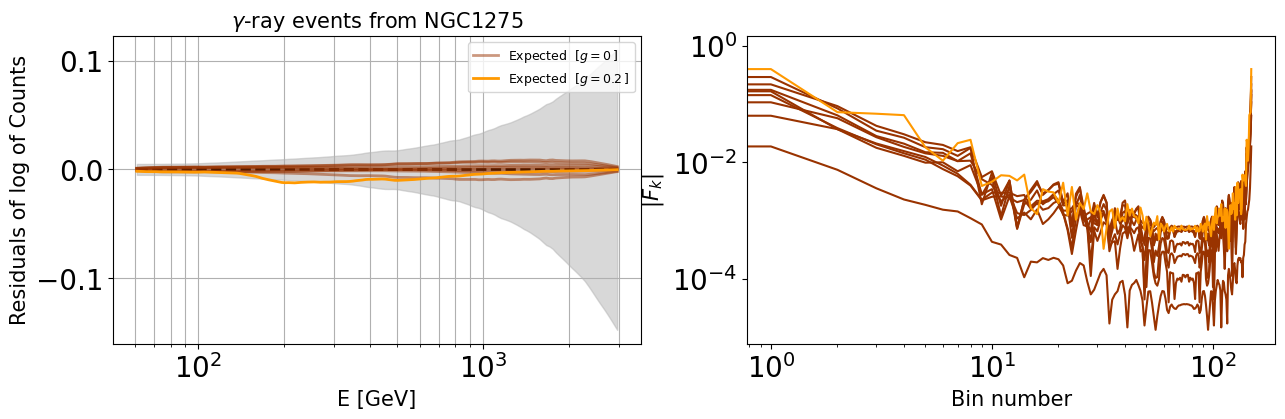

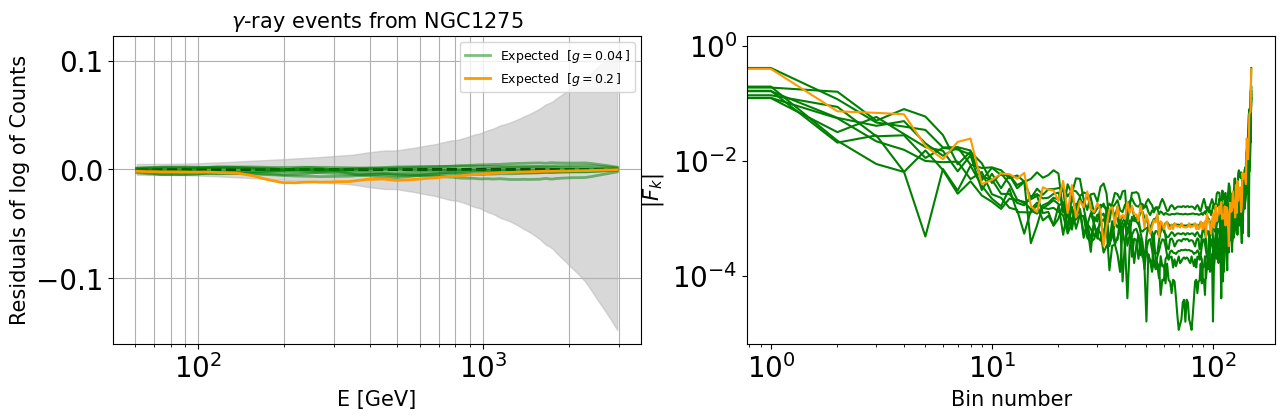

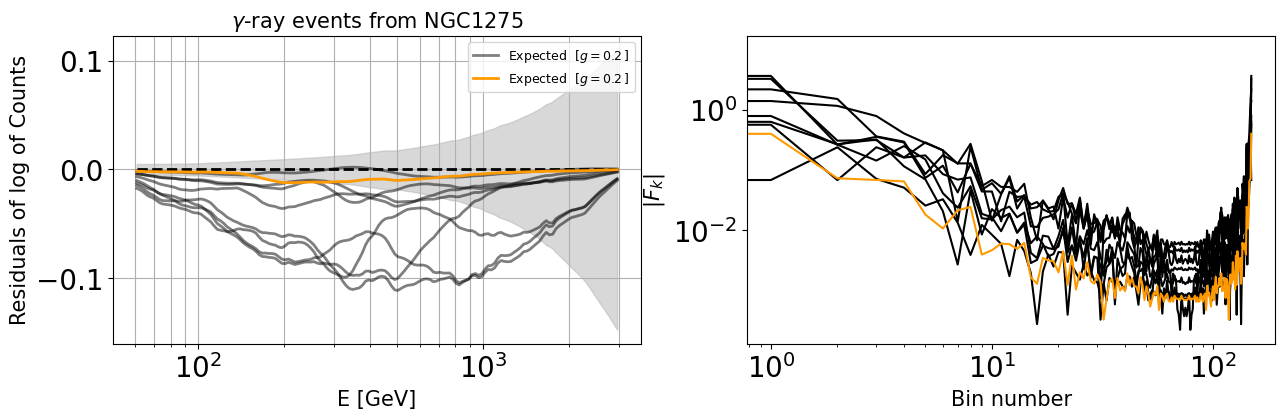

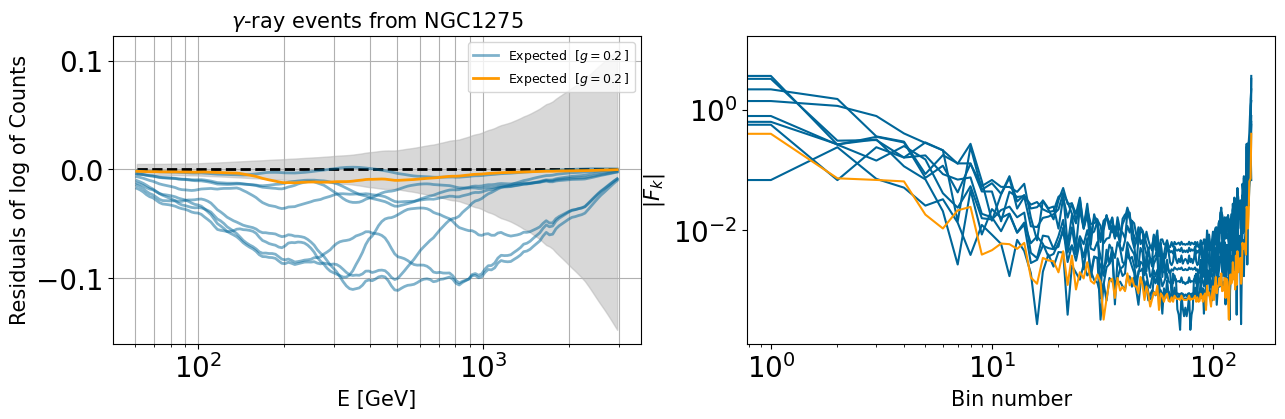

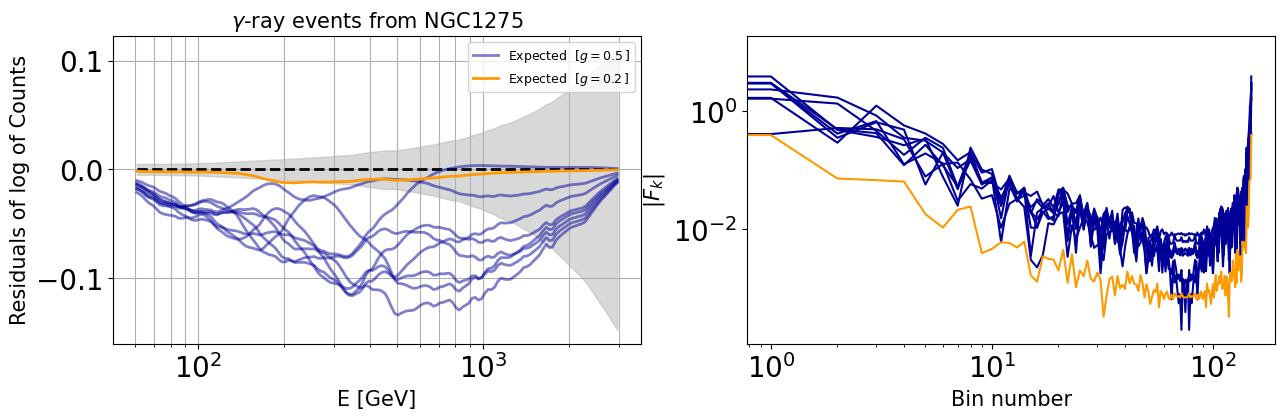

In [68]:
comparisons(4)

 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
 legend.py:1236 --- WARNING: No artists with labels found to put in le

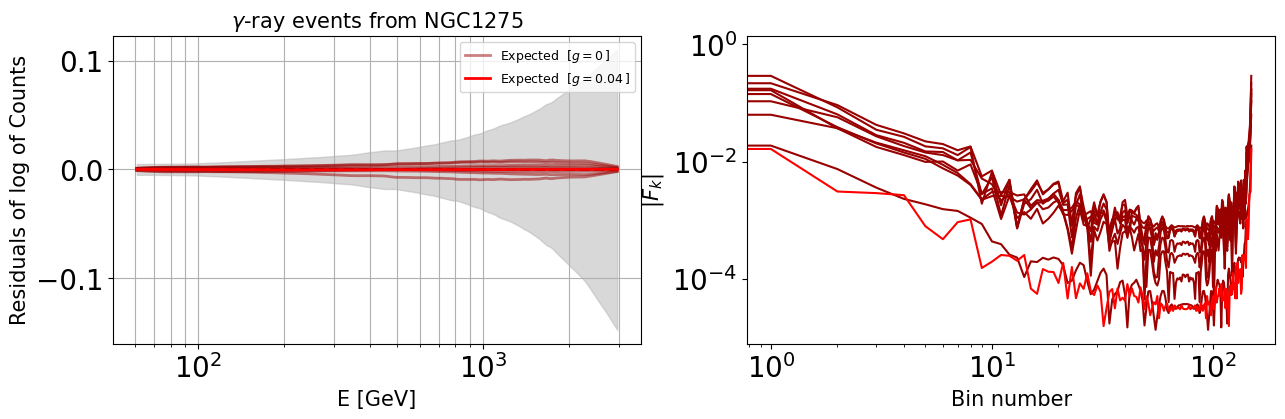

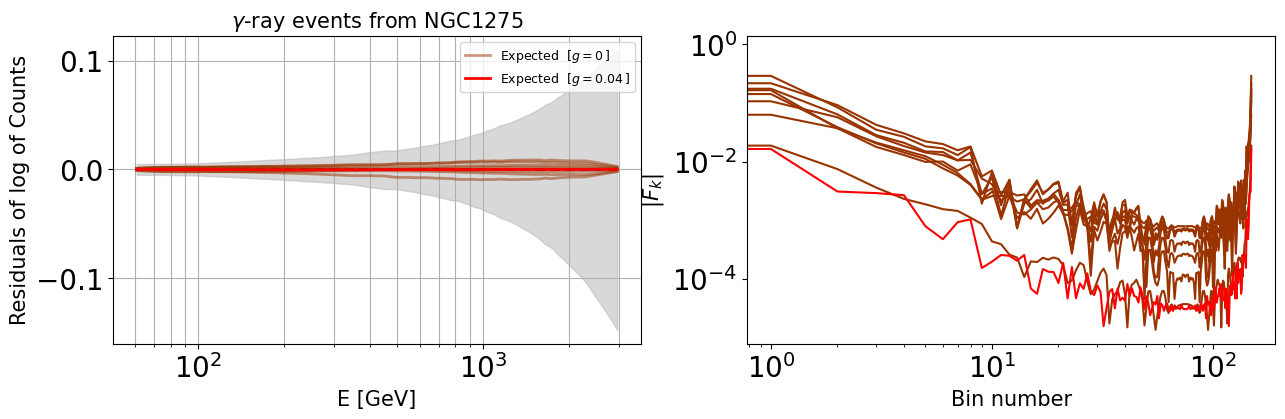

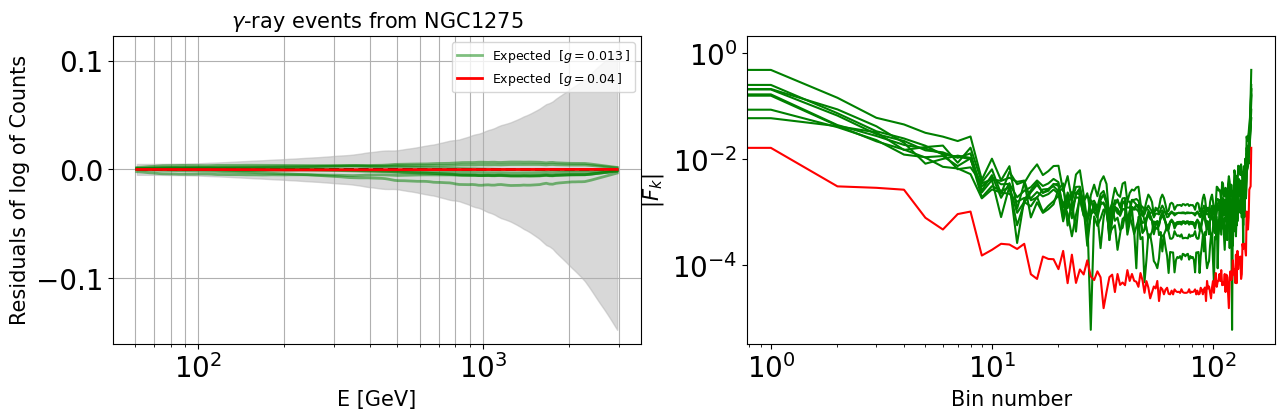

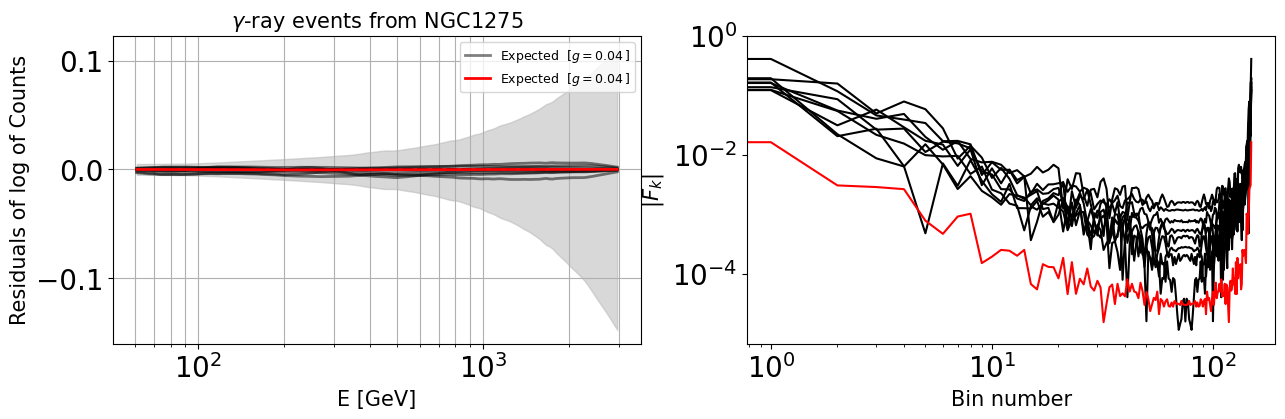

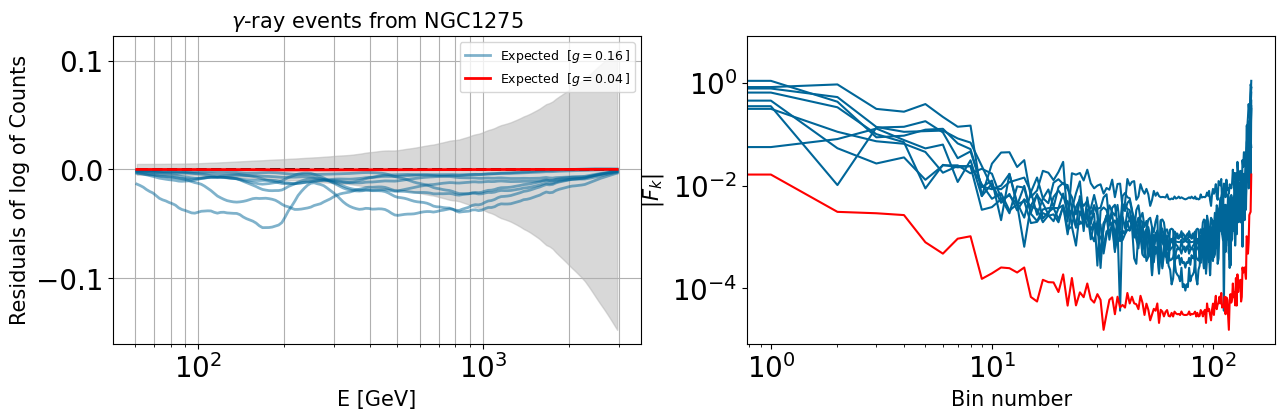

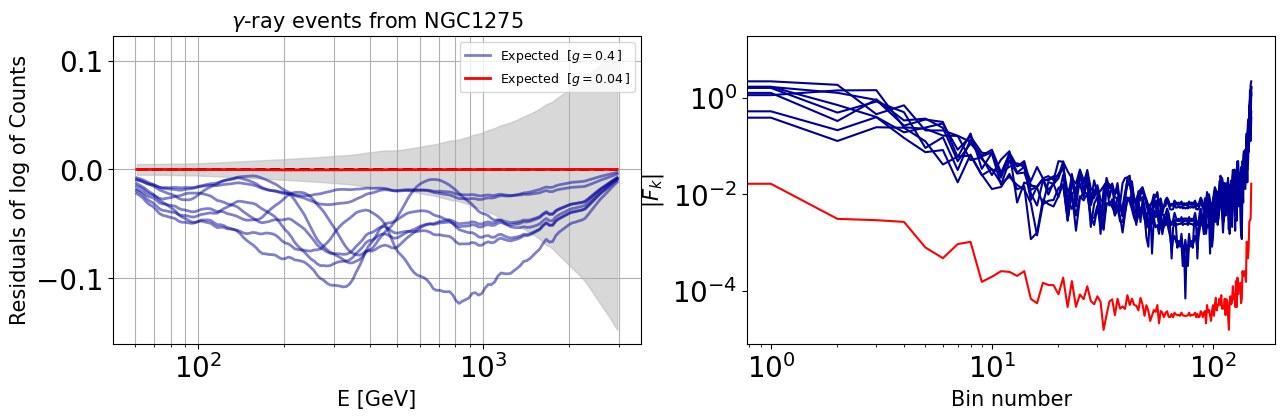

In [69]:
comparisons(5)